# Trabalho Prático de Dados e Apredizagem Automática (Dataset dos docentes)

## Introdução

## Imports

In [375]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import time
import math
from sklearn.svm import SVC
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from livelossplot import PlotLossesKerasTF
from xgboost import XGBClassifier

RANDOM_SEED = 2021

# Estudo dos dados

## Visualização dos dados

In [376]:
training_set = pd.read_csv('training_data.csv')
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


### Visualização de Outliers

#### Feature delay_in_seconds

<AxesSubplot:>

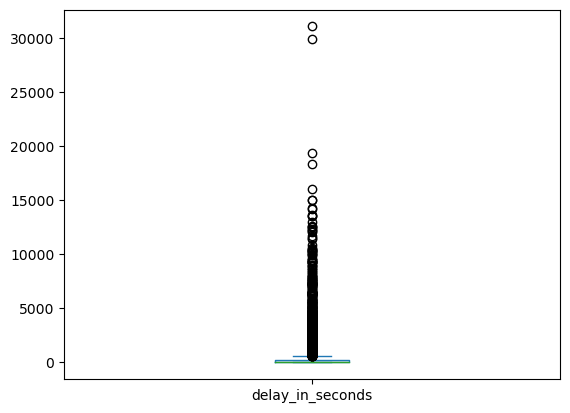

In [206]:
training_set["delay_in_seconds"].plot.box()

In [207]:
training_set['delay_in_seconds'].describe()

count     5000.000000
mean       560.567000
std       1686.859581
min          0.000000
25%          0.000000
50%          0.000000
75%        234.000000
max      31083.000000
Name: delay_in_seconds, dtype: float64

In [208]:
training_set['delay_in_seconds'].value_counts(bins=9)

(-31.084, 3453.667]       4776
(3453.667, 6907.333]       143
(6907.333, 10361.0]         53
(10361.0, 13814.667]        19
(13814.667, 17268.333]       5
(17268.333, 20722.0]         2
(27629.333, 31083.0]         2
(20722.0, 24175.667]         0
(24175.667, 27629.333]       0
Name: delay_in_seconds, dtype: int64

#### Feature avg_temperature

<AxesSubplot:>

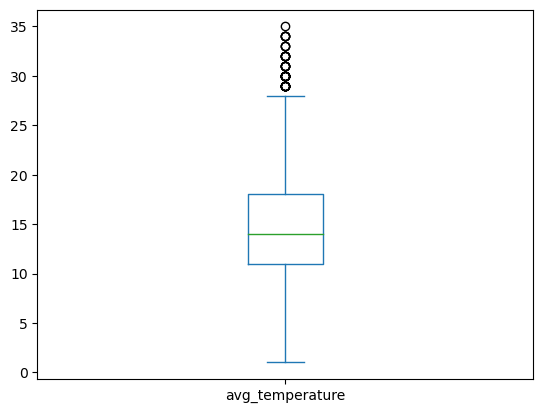

In [209]:
training_set["avg_temperature"].plot.box()

In [210]:
training_set['avg_temperature'].describe()

count    5000.000000
mean       14.583000
std         4.820514
min         1.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        35.000000
Name: avg_temperature, dtype: float64

#### Feature avg_atm_pressure

<AxesSubplot:>

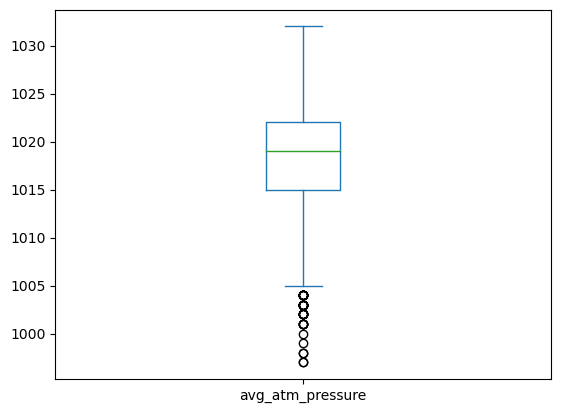

In [211]:
training_set["avg_atm_pressure"].plot.box()

In [212]:
training_set['avg_atm_pressure'].describe()

count    5000.000000
mean     1018.145000
std         5.174372
min       997.000000
25%      1015.000000
50%      1019.000000
75%      1022.000000
max      1032.000000
Name: avg_atm_pressure, dtype: float64

#### Feature avg_humidity

<AxesSubplot:>

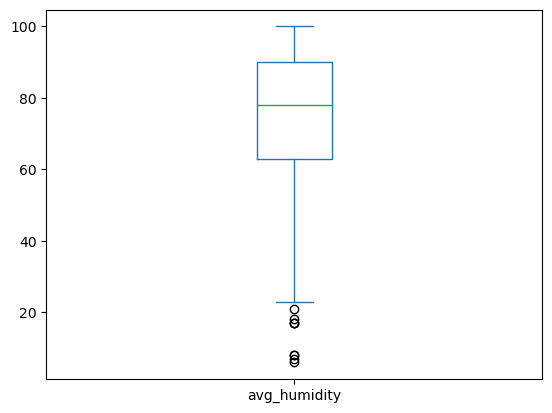

In [213]:
training_set["avg_humidity"].plot.box()

In [214]:
training_set['avg_humidity'].describe()

count    5000.000000
mean       74.455000
std        17.204638
min         6.000000
25%        63.000000
50%        78.000000
75%        90.000000
max       100.000000
Name: avg_humidity, dtype: float64

#### Feature avg_wind_speed

<AxesSubplot:>

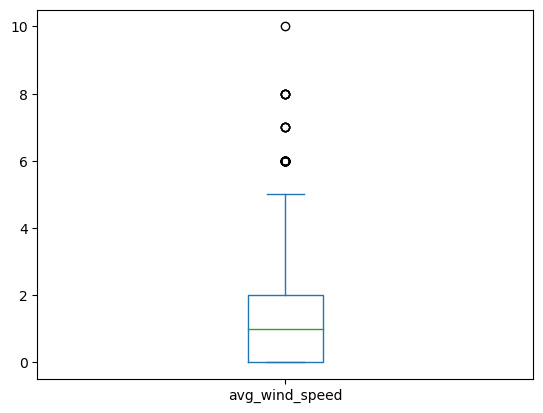

In [215]:
training_set["avg_wind_speed"].plot.box()

In [216]:
training_set['avg_wind_speed'].describe()

count    5000.000000
mean        1.253500
std         1.269847
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: avg_wind_speed, dtype: float64

#### Feature avg_precipitation

<AxesSubplot:>

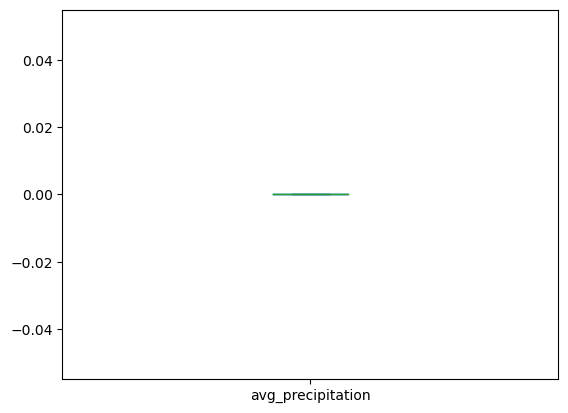

In [217]:
training_set["avg_precipitation"].plot.box()

In [218]:
training_set['avg_precipitation'].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

### Valores em falta

<AxesSubplot:>

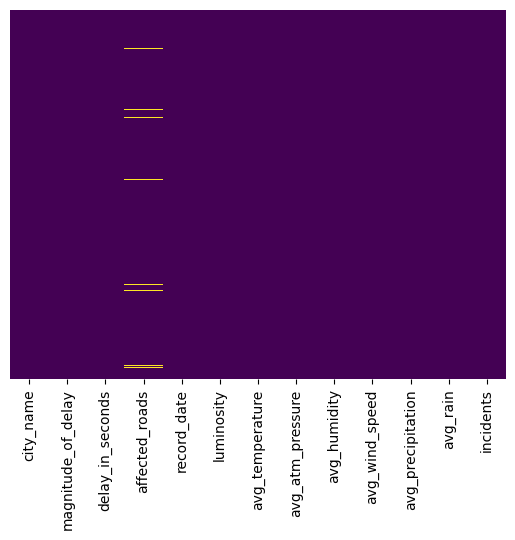

In [219]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Valores duplicados

In [220]:
training_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

### Features nominais

#### Feature magnitude_of_delay

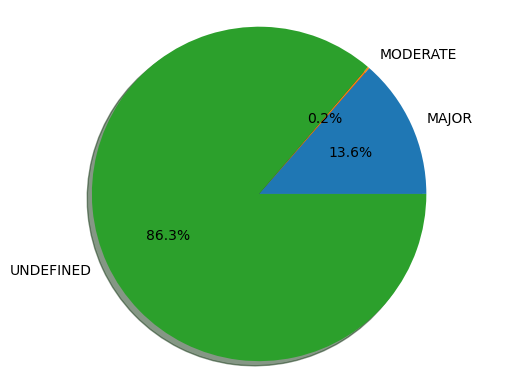

In [221]:
labels = training_set['magnitude_of_delay'].astype('category').cat.categories.tolist()
counts = training_set['magnitude_of_delay'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<AxesSubplot:>

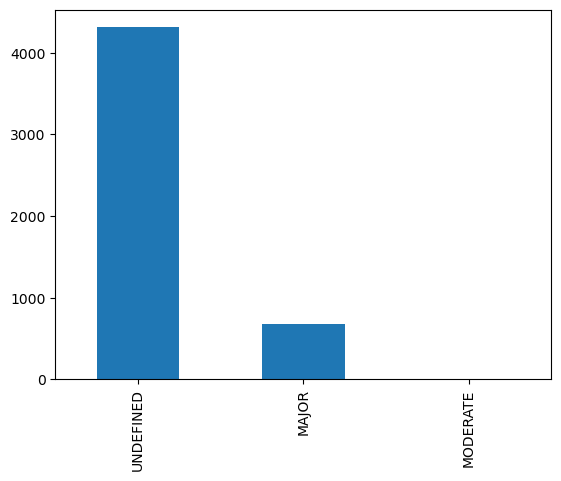

In [222]:
training_set['magnitude_of_delay'].value_counts().plot(kind='bar')

In [223]:
training_set['magnitude_of_delay'].value_counts(ascending=True)

MODERATE        8
MAJOR         678
UNDEFINED    4314
Name: magnitude_of_delay, dtype: int64

#### Feature luminosity

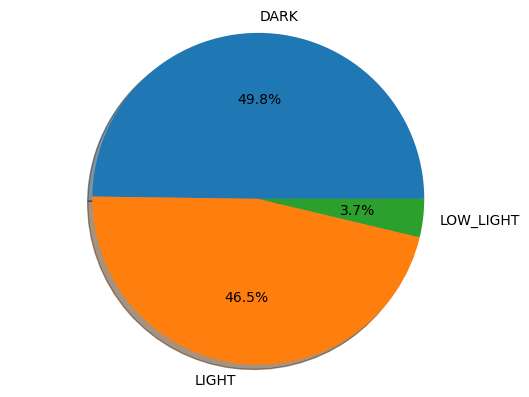

In [224]:
labels = training_set['luminosity'].astype('category').cat.categories.tolist()
counts = training_set['luminosity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<AxesSubplot:>

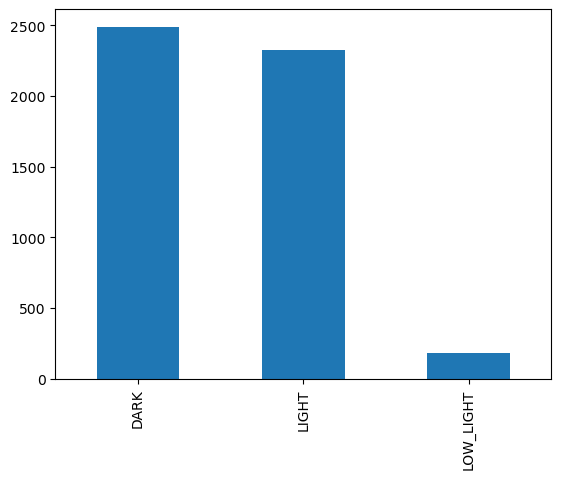

In [225]:
training_set['luminosity'].value_counts().plot(kind='bar')

In [226]:
training_set['luminosity'].value_counts(ascending=True)

LOW_LIGHT     186
LIGHT        2325
DARK         2489
Name: luminosity, dtype: int64

#### Feature avg_rain

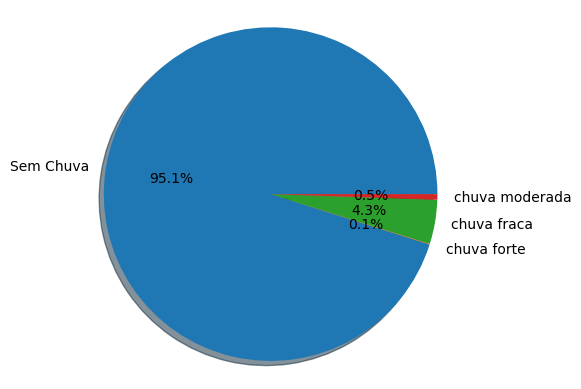

In [227]:
labels = training_set['avg_rain'].astype('category').cat.categories.tolist()
counts = training_set['avg_rain'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<AxesSubplot:>

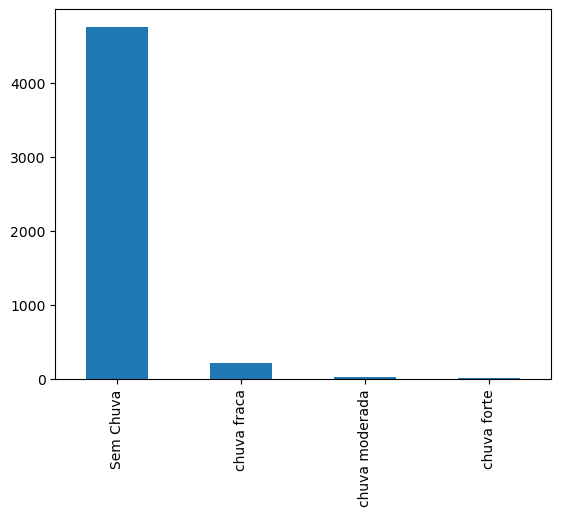

In [228]:
training_set['avg_rain'].value_counts().plot(kind='bar')

In [229]:
training_set['avg_rain'].value_counts(ascending=True)

chuva forte          3
chuva moderada      27
chuva fraca        214
Sem Chuva         4756
Name: avg_rain, dtype: int64

#### Feature (alvo) incidents 

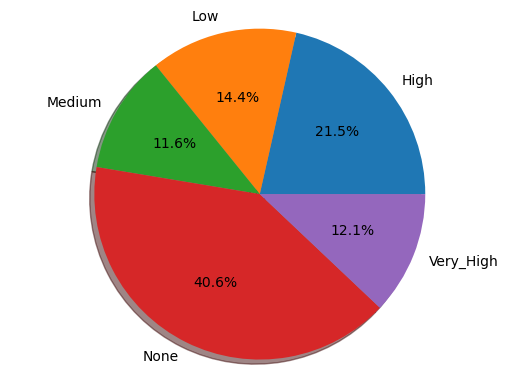

In [230]:
labels = training_set['incidents'].astype('category').cat.categories.tolist()
counts = training_set['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<AxesSubplot:>

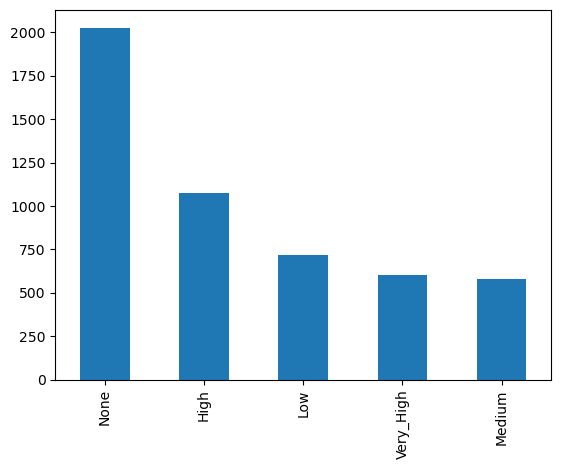

In [231]:
training_set['incidents'].value_counts().plot(kind='bar')

In [232]:
training_set['incidents'].value_counts(ascending=True)

Medium        578
Very_High     603
Low           718
High         1073
None         2028
Name: incidents, dtype: int64

### Análise da tendência central dos dados


In [233]:
training_set[["delay_in_seconds", "avg_temperature", "avg_atm_pressure", "avg_humidity", "avg_wind_speed"]].describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,560.567000,14.583000,1018.145000,74.455000,1.253500
std,1686.859581,4.820514,5.174372,17.204638,1.269847
min,0.000000,1.000000,997.000000,6.000000,0.000000
25%,0.000000,11.000000,1015.000000,63.000000,0.000000
50%,0.000000,14.000000,1019.000000,78.000000,1.000000
75%,234.000000,18.000000,1022.000000,90.000000,2.000000
max,31083.000000,35.000000,1032.000000,100.000000,10.000000


### Análise da dispersão estatística dos dados

<AxesSubplot:xlabel='avg_precipitation', ylabel='Count'>

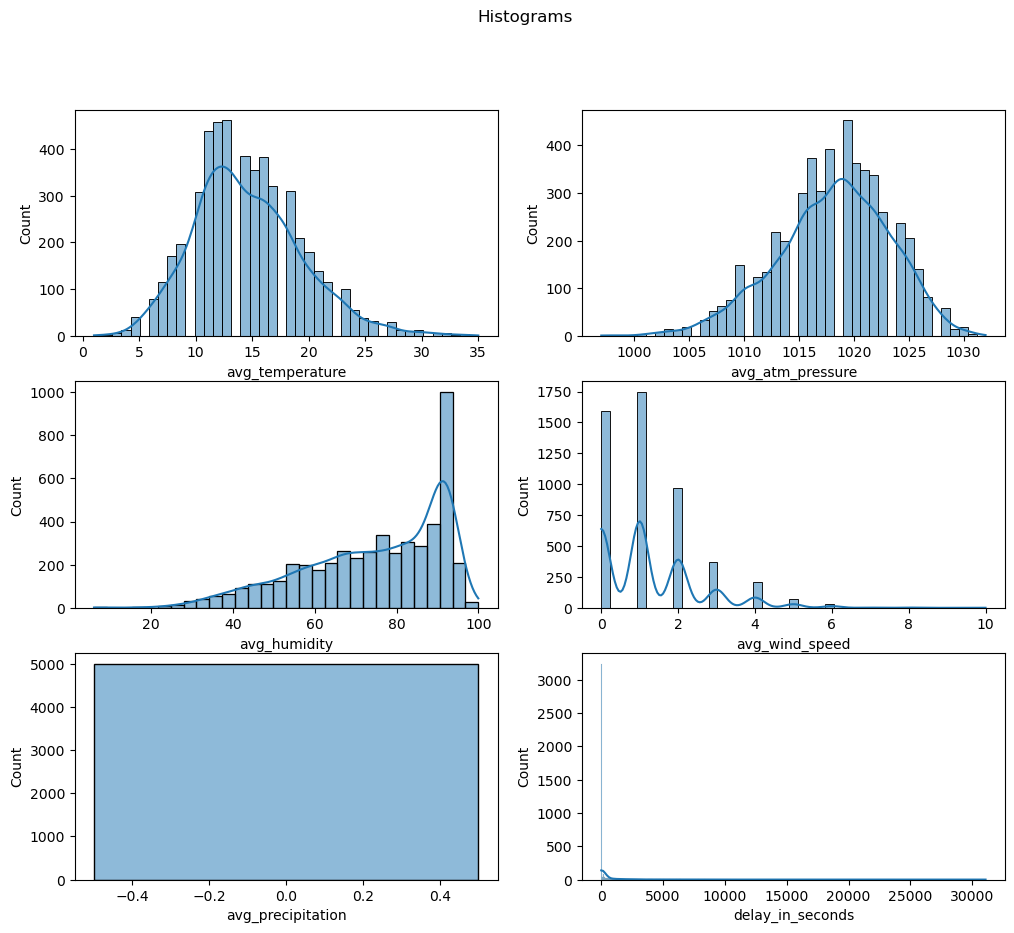

In [234]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Histograms')

sns.histplot(training_set['avg_temperature'], ax=axs[0, 0], kde=True)
sns.histplot(training_set['avg_atm_pressure'], ax=axs[0, 1], kde=True)
sns.histplot(training_set['avg_humidity'], ax=axs[1, 0], kde=True)
sns.histplot(training_set['avg_wind_speed'], ax=axs[1, 1], kde=True)
sns.histplot(training_set['delay_in_seconds'], ax=axs[2, 1], kde=True)
sns.histplot(training_set['avg_precipitation'], ax=axs[2, 0], kde=True)

## Análise multivariada

### Correlação entre features

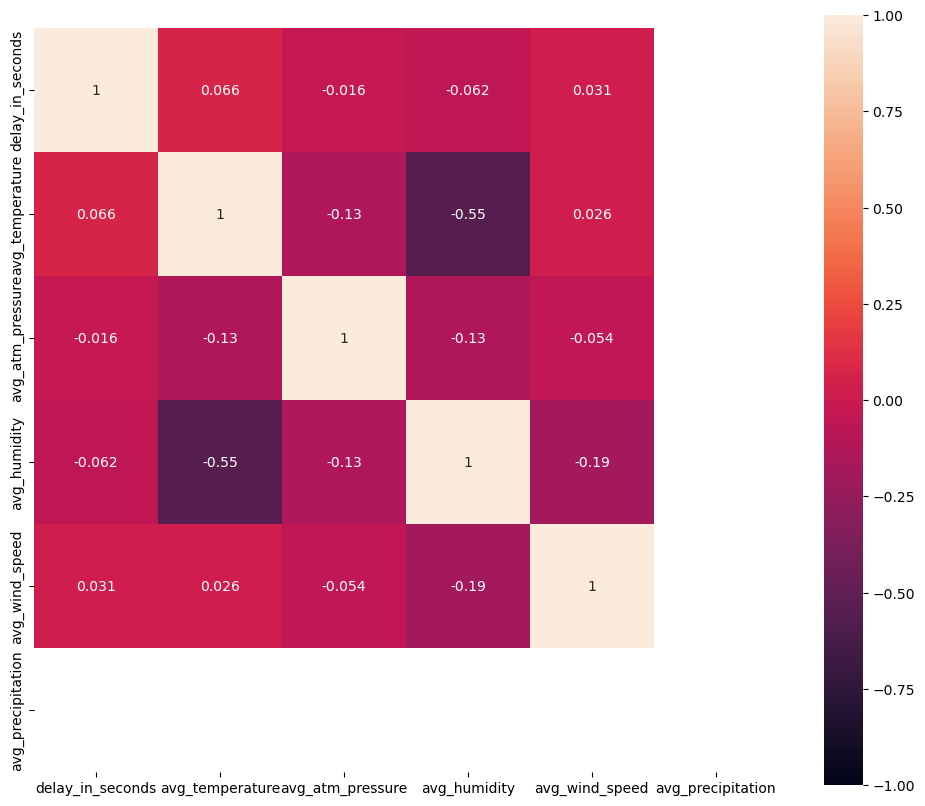

In [235]:
corr_matrix = training_set.corr()
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

### Relações

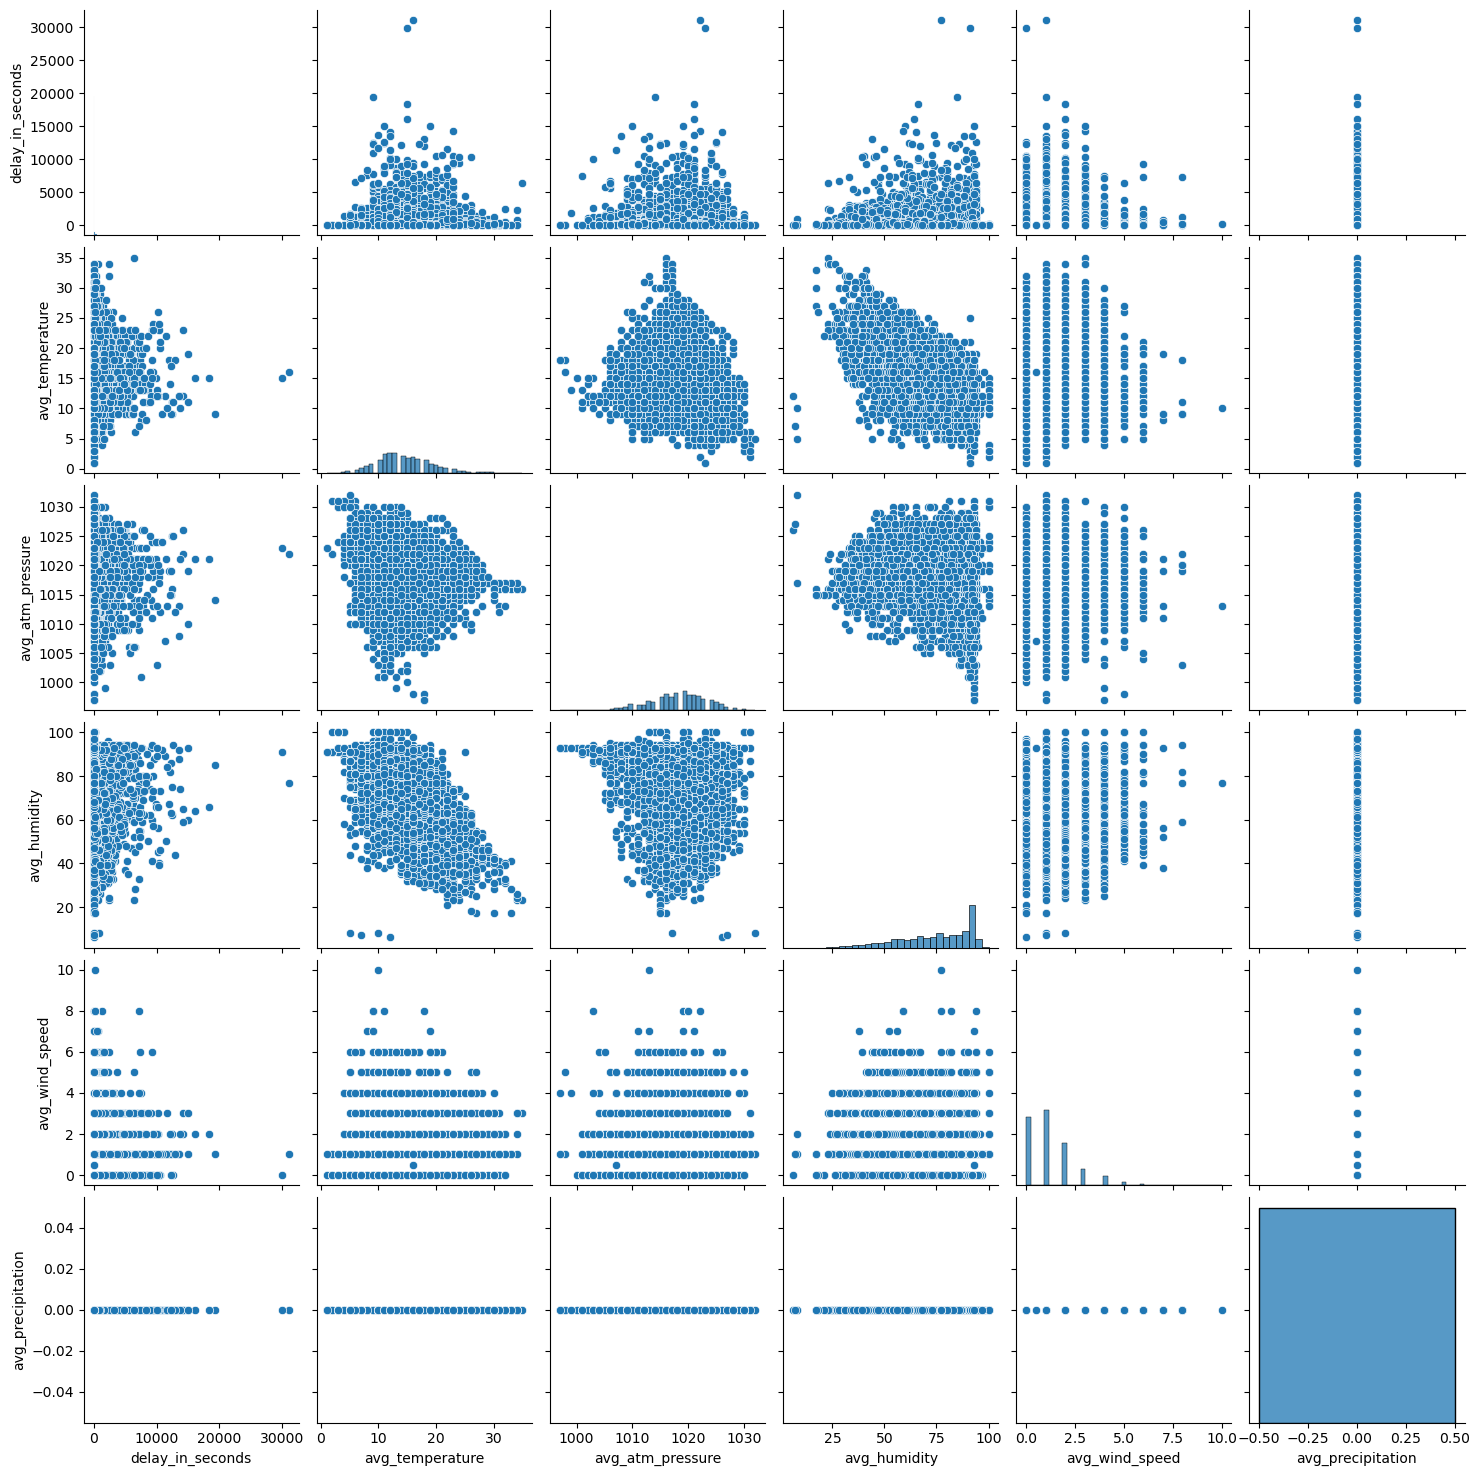

In [236]:
sns.pairplot(training_set)

## Tratamento e Preparação dos dados

### Eliminação de features

In [377]:
training_set = training_set.drop(columns=["city_name", "avg_precipitation", "avg_wind_speed", "avg_atm_pressure"])
training_set

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_humidity,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,70.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,91.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,64.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,75.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,52.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,56.0,Sem Chuva,High
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,68.0,Sem Chuva,None
4997,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,47.0,Sem Chuva,None
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,93.0,Sem Chuva,None


### Tratamento de valores em falta

In [378]:
training_set["affected_roads"].fillna(",",inplace=True)
training_set

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_humidity,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,70.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,91.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,64.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,75.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,52.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,56.0,Sem Chuva,High
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,68.0,Sem Chuva,None
4997,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,47.0,Sem Chuva,None
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,93.0,Sem Chuva,None


In [379]:
training_set.isna().any()

magnitude_of_delay    False
delay_in_seconds      False
affected_roads        False
record_date           False
luminosity            False
avg_temperature       False
avg_humidity          False
avg_rain              False
incidents             False
dtype: bool

### Feature Engineering

#### Criação da feature Number_of_Roads 

In [380]:
columns = {"Number_of_Roads"}
for new_column in columns:
    training_set[new_column] = np.nan

training_set

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_humidity,avg_rain,incidents,Number_of_Roads
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,70.0,Sem Chuva,None,NaN
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,91.0,Sem Chuva,None,NaN
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,64.0,Sem Chuva,Low,NaN
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,75.0,Sem Chuva,Very_High,NaN
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,52.0,Sem Chuva,High,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,56.0,Sem Chuva,High,NaN
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,68.0,Sem Chuva,None,NaN
4997,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,47.0,Sem Chuva,None,NaN
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,93.0,Sem Chuva,None,NaN


In [381]:
index = 0
for value in training_set["affected_roads"]:
    number = 0
    for road in value.split(','):
        if(road != ""):
            number += 1
    training_set.at[index,"Number_of_Roads"]= number            
    index += 1   

training_set = training_set.drop(columns=["affected_roads"])
training_set

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_humidity,avg_rain,incidents,Number_of_Roads
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,70.0,Sem Chuva,None,0.0
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,91.0,Sem Chuva,None,1.0
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,64.0,Sem Chuva,Low,0.0
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,75.0,Sem Chuva,Very_High,11.0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,52.0,Sem Chuva,High,5.0
...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,2021-04-13 00:00,DARK,13.0,56.0,Sem Chuva,High,5.0
4996,UNDEFINED,0,2021-07-06 14:00,LIGHT,19.0,68.0,Sem Chuva,None,5.0
4997,UNDEFINED,0,2021-03-18 03:00,DARK,13.0,47.0,Sem Chuva,None,0.0
4998,UNDEFINED,0,2021-11-02 06:00,DARK,12.0,93.0,Sem Chuva,None,5.0


### Criação das features record_date:month, record_date:day, record_date:hour 

#### Date

In [382]:
training_set['record_date'] = pd.to_datetime(training_set['record_date'])
training_set['record_date:month'] = training_set['record_date'].dt.month
training_set['record_date:day'] = training_set['record_date'].dt.day
training_set['record_date:hour'] = training_set['record_date'].dt.hour
training_set = training_set.drop(columns="record_date")
training_set

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_humidity,avg_rain,incidents,Number_of_Roads,record_date:month,record_date:day,record_date:hour
0,UNDEFINED,0,DARK,12.0,70.0,Sem Chuva,None,0.0,3,15,23
1,UNDEFINED,385,DARK,12.0,91.0,Sem Chuva,None,1.0,12,25,18
2,UNDEFINED,69,LIGHT,14.0,64.0,Sem Chuva,Low,0.0,3,12,15
3,MAJOR,2297,LIGHT,15.0,75.0,Sem Chuva,Very_High,11.0,9,29,9
4,UNDEFINED,0,LIGHT,27.0,52.0,Sem Chuva,High,5.0,6,13,11
...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,DARK,13.0,56.0,Sem Chuva,High,5.0,4,13,0
4996,UNDEFINED,0,LIGHT,19.0,68.0,Sem Chuva,None,5.0,7,6,14
4997,UNDEFINED,0,DARK,13.0,47.0,Sem Chuva,None,0.0,3,18,3
4998,UNDEFINED,0,DARK,12.0,93.0,Sem Chuva,None,5.0,11,2,6


### Normalização dos dados

In [383]:
columns = {"delay_in_seconds", "avg_temperature", "avg_humidity"}

for column in columns:
    training_set[column] = (training_set[column] - training_set[column].min()) / (training_set[column].max() - training_set[column].min())         
        
training_set

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_humidity,avg_rain,incidents,Number_of_Roads,record_date:month,record_date:day,record_date:hour
0,UNDEFINED,0.000000,DARK,0.323529,0.680851,Sem Chuva,None,0.0,3,15,23
1,UNDEFINED,0.012386,DARK,0.323529,0.904255,Sem Chuva,None,1.0,12,25,18
2,UNDEFINED,0.002220,LIGHT,0.382353,0.617021,Sem Chuva,Low,0.0,3,12,15
3,MAJOR,0.073899,LIGHT,0.411765,0.734043,Sem Chuva,Very_High,11.0,9,29,9
4,UNDEFINED,0.000000,LIGHT,0.764706,0.489362,Sem Chuva,High,5.0,6,13,11
...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0.000000,DARK,0.352941,0.531915,Sem Chuva,High,5.0,4,13,0
4996,UNDEFINED,0.000000,LIGHT,0.529412,0.659574,Sem Chuva,None,5.0,7,6,14
4997,UNDEFINED,0.000000,DARK,0.352941,0.436170,Sem Chuva,None,0.0,3,18,3
4998,UNDEFINED,0.000000,DARK,0.323529,0.925532,Sem Chuva,None,5.0,11,2,6


### Clustering

In [384]:
kmeans = KMeans(init="random", n_clusters=9, n_init=10, random_state=1)

cluster1 = kmeans.fit(training_set[["delay_in_seconds"]])
training_set['cluster'] = cluster1.labels_

training_set

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_humidity,avg_rain,incidents,Number_of_Roads,record_date:month,record_date:day,record_date:hour,cluster
0,UNDEFINED,0.000000,DARK,0.323529,0.680851,Sem Chuva,None,0.0,3,15,23,1
1,UNDEFINED,0.012386,DARK,0.323529,0.904255,Sem Chuva,None,1.0,12,25,18,1
2,UNDEFINED,0.002220,LIGHT,0.382353,0.617021,Sem Chuva,Low,0.0,3,12,15,1
3,MAJOR,0.073899,LIGHT,0.411765,0.734043,Sem Chuva,Very_High,11.0,9,29,9,7
4,UNDEFINED,0.000000,LIGHT,0.764706,0.489362,Sem Chuva,High,5.0,6,13,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0.000000,DARK,0.352941,0.531915,Sem Chuva,High,5.0,4,13,0,1
4996,UNDEFINED,0.000000,LIGHT,0.529412,0.659574,Sem Chuva,None,5.0,7,6,14,1
4997,UNDEFINED,0.000000,DARK,0.352941,0.436170,Sem Chuva,None,0.0,3,18,3,1
4998,UNDEFINED,0.000000,DARK,0.323529,0.925532,Sem Chuva,None,5.0,11,2,6,1


### Discretização de valores nominais

#### Label Encoding

In [385]:
scale_mapper = {"UNDEFINED":0, "MODERATE":1, "MAJOR":2}
training_set["magnitude_of_delay"] = training_set["magnitude_of_delay"].replace(scale_mapper)

scale_mapper1 = {"DARK":0, "LIGHT":1, "LOW_LIGHT":2}
training_set["luminosity"] = training_set["luminosity"].replace(scale_mapper1)

scale_mapper2 = {"Sem Chuva":0, "chuva fraca":1, "chuva moderada":2, "chuva forte":3}
training_set["avg_rain"] = training_set["avg_rain"].replace(scale_mapper2)

scale_mapper3 = {"None":0, "Low":1, "Medium":2, "High":3, "Very_High":4}
training_set["incidents"] = training_set["incidents"].replace(scale_mapper3)

training_set

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_humidity,avg_rain,incidents,Number_of_Roads,record_date:month,record_date:day,record_date:hour,cluster
0,0,0.000000,0,0.323529,0.680851,0,0,0.0,3,15,23,1
1,0,0.012386,0,0.323529,0.904255,0,0,1.0,12,25,18,1
2,0,0.002220,1,0.382353,0.617021,0,1,0.0,3,12,15,1
3,2,0.073899,1,0.411765,0.734043,0,4,11.0,9,29,9,7
4,0,0.000000,1,0.764706,0.489362,0,3,5.0,6,13,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.000000,0,0.352941,0.531915,0,3,5.0,4,13,0,1
4996,0,0.000000,1,0.529412,0.659574,0,0,5.0,7,6,14,1
4997,0,0.000000,0,0.352941,0.436170,0,0,0.0,3,18,3,1
4998,0,0.000000,0,0.323529,0.925532,0,0,5.0,11,2,6,1


### Correlação entre features

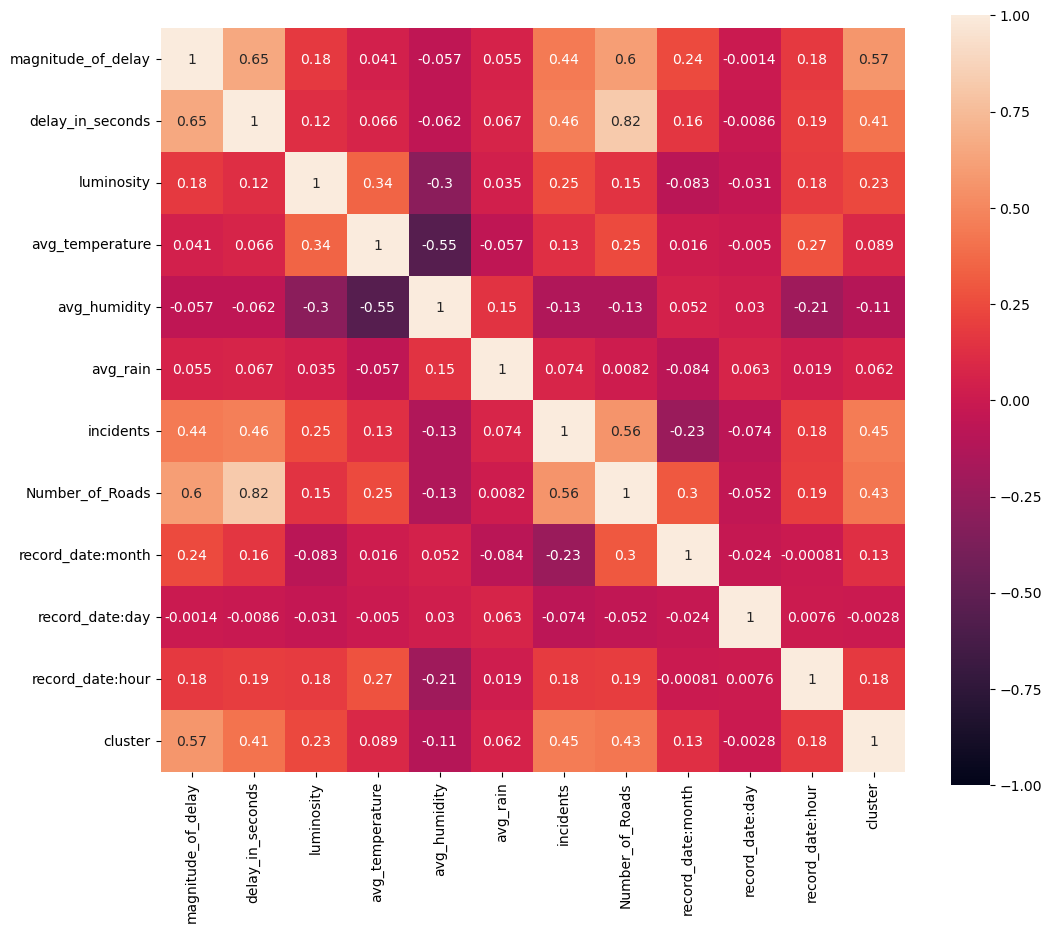

In [386]:
corr_matrix = training_set.corr()
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

## Modelos de Machine Learning

In [387]:
dtl_model = training_set
training_set = training_set.drop(columns=['incidents'])

X = training_set[['magnitude_of_delay', 'delay_in_seconds', 'luminosity', 'avg_temperature', 'avg_humidity', 'avg_rain', 'Number_of_Roads', 'record_date:month', 'record_date:day', 'record_date:hour', 'cluster']]
y = dtl_model['incidents']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Decision Tree Learner

In [151]:
starttime = time.process_time()

modelTreeLearner = DecisionTreeClassifier(random_state=2022)
print(modelTreeLearner)
modelTreeLearner.fit(X_train, y_train)

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

DecisionTreeClassifier(random_state=2022)
Tempo decorrido: 0.010176263000005292 segundos


In [152]:
predictions_treeLeaner = modelTreeLearner.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions_treeLeaner))
print("Modelo Decision Tree Classifier: \n", classification_report(y_test, predictions_treeLeaner))

Accuracy:  0.9032
Modelo Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       503
           1       0.86      0.84      0.85       196
           2       0.84      0.87      0.86       148
           3       0.88      0.87      0.87       265
           4       0.84      0.85      0.84       138

    accuracy                           0.90      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.90      0.90      0.90      1250



#### Matriz de confusão

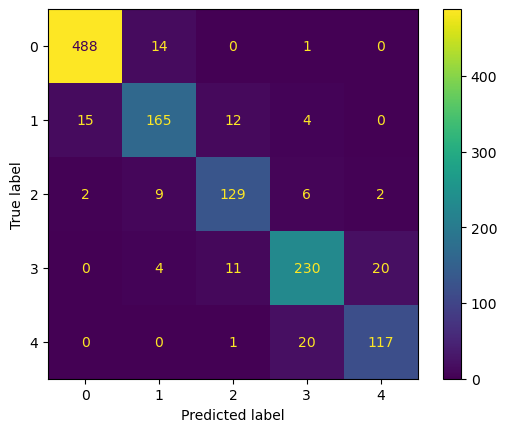

In [153]:
cm = confusion_matrix(y_test, predictions_treeLeaner, labels=modelTreeLearner.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelTreeLearner.classes_)

disp.plot()

### Random Tree Forest

In [322]:
starttime = time.process_time()

modelForest = RandomForestClassifier(n_estimators = 6000, max_features = 7, random_state = 42)

print(modelForest)
modelForest.fit(X_train, y_train)

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

RandomForestClassifier(max_features=7, n_estimators=6000, random_state=42)
Tempo decorrido: 20.887107593998735 segundos


#### Resultados

In [323]:
predictionsForest = modelForest.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictionsForest))
print("Modelo Random Tree Forest Classifier: \n", classification_report(y_test, predictionsForest))

Accuracy:  0.9304
Modelo Random Tree Forest Classifier: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       503
           1       0.90      0.88      0.89       196
           2       0.90      0.86      0.88       148
           3       0.92      0.92      0.92       265
           4       0.92      0.92      0.92       138

    accuracy                           0.93      1250
   macro avg       0.92      0.91      0.92      1250
weighted avg       0.93      0.93      0.93      1250



#### Matriz de confusão

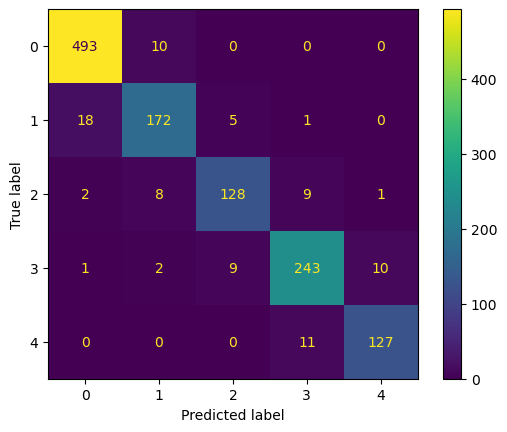

In [324]:
cm = confusion_matrix(y_test, predictionsForest, labels=modelForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelForest.classes_)

disp.plot()

### Bagging

In [360]:
starttime = time.process_time()

modelBagging = BaggingClassifier(n_estimators=1500, random_state=42)

print(modelBagging)
modelBagging.fit(X_train, y_train)

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

BaggingClassifier(n_estimators=1500, random_state=42)
Tempo decorrido: 6.964005269999689 segundos


#### Resultados

In [362]:
predictionsBagging = modelBagging.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictionsBagging))
print("Modelo Random Tree Forest Classifier: \n", classification_report(y_test, predictionsForest))

Accuracy:  0.9288
Modelo Random Tree Forest Classifier: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       503
           1       0.90      0.88      0.89       196
           2       0.90      0.86      0.88       148
           3       0.92      0.92      0.92       265
           4       0.92      0.92      0.92       138

    accuracy                           0.93      1250
   macro avg       0.92      0.91      0.92      1250
weighted avg       0.93      0.93      0.93      1250



#### Matriz de confusão

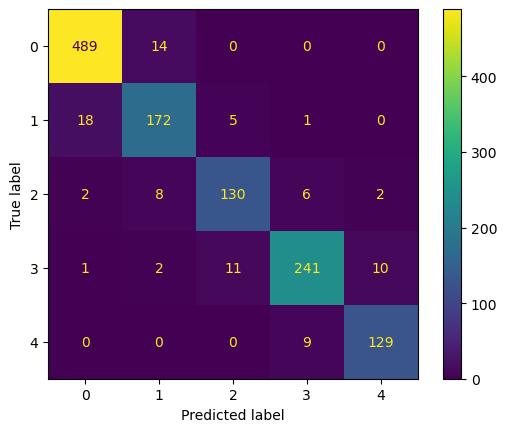

In [363]:
cm = confusion_matrix(y_test, predictionsBagging, labels=modelForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelForest.classes_)

disp.plot()

### XGBoost

In [157]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [158]:
starttime = time.process_time()

modelBoost = XGBClassifier(n_estimators = 1500)
modelBoost.fit(X_train, y_train)

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

Tempo decorrido: 49.38009357 segundos


#### Resultados

In [159]:
predictionsBoost = modelBoost.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictionsBoost))

print("Modelo XGBoost: \n", classification_report(y_test, predictionsBoost))

Accuracy:  0.9224
Modelo XGBoost: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       503
           1       0.88      0.89      0.88       196
           2       0.89      0.84      0.86       148
           3       0.91      0.88      0.90       265
           4       0.88      0.91      0.89       138

    accuracy                           0.92      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.92      0.92      0.92      1250



#### Matriz de confusão

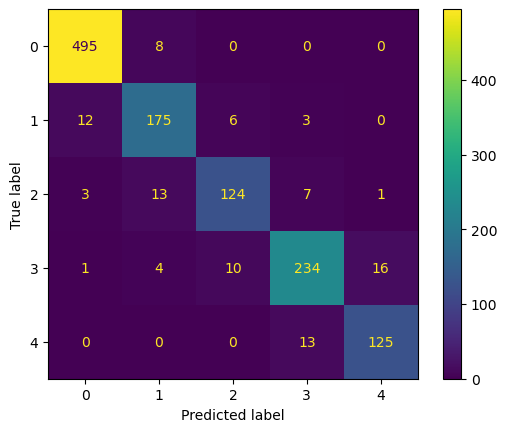

In [160]:
cm = confusion_matrix(y_test, predictionsBoost, labels=modelBoost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelBoost.classes_)

disp.plot()

### Multi-Layer Preceptron Classifier

In [397]:
def build_model(activation='relu', learning_rate=0.01):
    modelNeuralNetwork = Sequential()
    modelNeuralNetwork.add(Dense(16, input_dim=11, activation=activation))
    modelNeuralNetwork.add(Dense(8, activation=activation))
    modelNeuralNetwork.add(Dense(5, activation='softmax'))
    
    modelNeuralNetwork.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.optimizers.Adam(learning_rate), metrics = ['accuracy'])
    return modelNeuralNetwork

modelNeuralNetwork = build_model()
modelNeuralNetwork.summary()

Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_693 (Dense)           (None, 16)                192       
                                                                 
 dense_694 (Dense)           (None, 8)                 136       
                                                                 
 dense_695 (Dense)           (None, 5)                 45        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [398]:
TUNING_DICT = { 'activation' : ['relu', 'sigmoid'], 'learning_rate' : [0.01, 0.001] }

In [399]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

modelNeuralNewtork = KerasClassifier(build_fn=build_model, epochs=20, batch_size=20)
grid_search = GridSearchCV(estimator = modelNeuralNewtork, param_grid = TUNING_DICT, cv = kf, scoring = 'accuracy', refit = 'True', verbose = 1)

grid_search.fit(X_train, y_train, validation_split=0.2)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20


/tmp/ipykernel_3929/505109574.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelNeuralNewtork = KerasClassifier(build_fn=build_model, epochs=20, batch_size=20)


120/120 [==============================] - 1s 4ms/step - loss: 1.4104 - accuracy: 0.5138 - val_loss: 1.0196 - val_accuracy: 0.6000
Epoch 2/20
120/120 [==============================] - 0s 3ms/step - loss: 0.9264 - accuracy: 0.6442 - val_loss: 0.8910 - val_accuracy: 0.6433
Epoch 3/20
120/120 [==============================] - 0s 3ms/step - loss: 0.8838 - accuracy: 0.6504 - val_loss: 0.8672 - val_accuracy: 0.6583
Epoch 4/20
120/120 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.6612 - val_loss: 0.7900 - val_accuracy: 0.6783
Epoch 5/20
120/120 [==============================] - 0s 3ms/step - loss: 0.8598 - accuracy: 0.6517 - val_loss: 0.8171 - val_accuracy: 0.6633
Epoch 6/20
120/120 [==============================] - 0s 2ms/step - loss: 0.8167 - accuracy: 0.6642 - val_loss: 0.7860 - val_accuracy: 0.6750
Epoch 7/20
120/120 [==============================] - 1s 4ms/step - loss: 0.8120 - accuracy: 0.6692 - val_loss: 0.8029 - val_accuracy: 0.6850
Epoch 8/20
120/12

In [400]:
bestModel = grid_search.best_estimator_

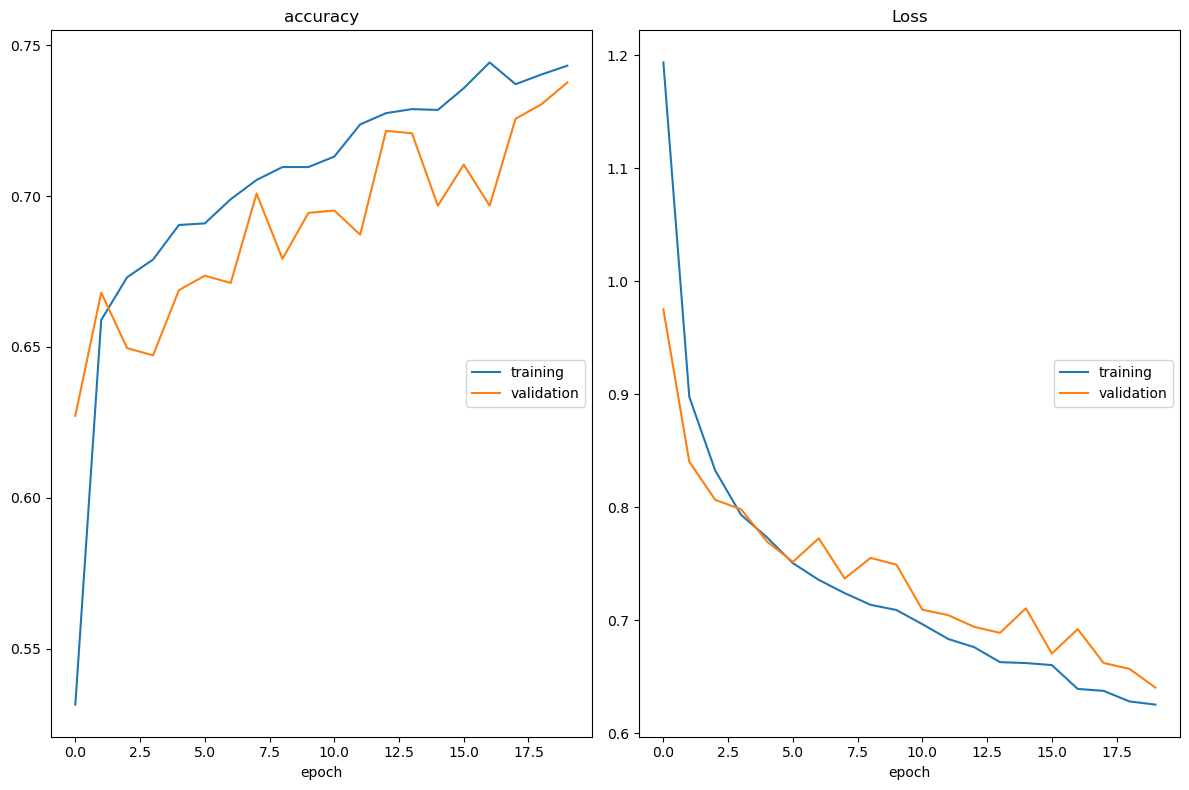

accuracy
	training         	 (min:    0.531, max:    0.744, cur:    0.743)
	validation       	 (min:    0.627, max:    0.738, cur:    0.738)
Loss
	training         	 (min:    0.625, max:    1.194, cur:    0.625)
	validation       	 (min:    0.640, max:    0.975, cur:    0.640)
188/188 [==============================] - 1s 5ms/step - loss: 0.6254 - accuracy: 0.7432 - val_loss: 0.6405 - val_accuracy: 0.7376


In [401]:
bestModel.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[PlotLossesKerasTF()], verbose=1)

#### Resultados

In [402]:
predictionsNeuralNetwork = bestModel.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictionsNeuralNetwork))
print("Modelo Multi-Layer Preceptron Classifier:\n", classification_report(y_test, predictionsNeuralNetwork))

40/40 [==============================] - 0s 2ms/step
Accuracy:  0.7376
Modelo Multi-Layer Preceptron Classifier:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       503
           1       0.56      0.37      0.45       196
           2       0.64      0.51      0.57       148
           3       0.72      0.78      0.75       265
           4       0.78      0.78      0.78       138

    accuracy                           0.74      1250
   macro avg       0.70      0.67      0.68      1250
weighted avg       0.72      0.74      0.72      1250



#### Matriz de confusão

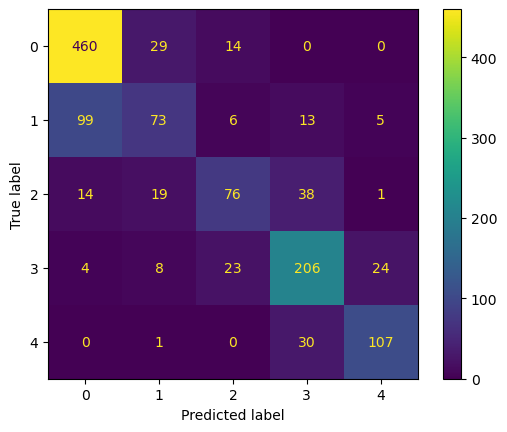

In [403]:
cm = confusion_matrix(y_test, predictionsNeuralNetwork, labels=bestModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bestModel.classes_)

disp.plot()

## Data Set de Teste

In [404]:
test_set = pd.read_csv('test_data.csv')

## Tratamento e preparação dos dados

In [405]:
test_set = test_set.drop(columns=["city_name", "avg_precipitation", "avg_wind_speed", "avg_atm_pressure"])
test_set["affected_roads"].fillna(",",inplace=True)


columns = {"Number_of_Roads"}
for new_column in columns:
    test_set[new_column] = np.nan
    
    
index = 0

for value in test_set["affected_roads"]:

    number = 0
    for road in value.split(','):
        if(road != ""):
            number += 1
            
    test_set.at[index,"Number_of_Roads"]= number
    index += 1

test_set = test_set.drop(columns=["affected_roads"])


test_set['record_date'] = pd.to_datetime(test_set['record_date'])
test_set['record_date:month'] = test_set['record_date'].dt.month
test_set['record_date:day'] = test_set['record_date'].dt.day
test_set['record_date:hour'] = test_set['record_date'].dt.hour
test_set = test_set.drop(columns="record_date")


colunas = {"delay_in_seconds", "avg_temperature", "avg_humidity"}
for column in colunas:
    test_set[column] = (test_set[column] - test_set[column].min()) / (test_set[column].max() - test_set[column].min())    
     
                
kmeans = KMeans(init="random", n_clusters=9, n_init=10, random_state=1)
cluster = kmeans.fit(test_set[["delay_in_seconds"]])
test_set['cluster'] = cluster.labels_
    
        
scale_mapper = {"UNDEFINED":0, "MODERATE":1, "MAJOR":2}
test_set["magnitude_of_delay"] = test_set["magnitude_of_delay"].replace(scale_mapper)

scale_mapper1 = {"DARK":0, "LIGHT":1, "LOW_LIGHT":2}
test_set["luminosity"] = test_set["luminosity"].replace(scale_mapper1)

scale_mapper2 = {"Sem Chuva":0, "chuva fraca":1, "chuva moderada":2, "chuva forte":3}
test_set["avg_rain"] = test_set["avg_rain"].replace(scale_mapper2)


test_set

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_humidity,avg_rain,Number_of_Roads,record_date:month,record_date:day,record_date:hour,cluster
0,0,0.081461,1,0.464286,0.784946,0,6.0,4,13,19,0
1,0,0.000000,0,0.500000,0.365591,0,5.0,10,13,4,1
2,0,0.000000,1,0.714286,0.688172,0,5.0,7,18,19,1
3,0,0.009417,1,0.571429,0.795699,0,6.0,10,30,15,1
4,0,0.000000,1,0.642857,0.849462,0,5.0,10,18,10,1
...,...,...,...,...,...,...,...,...,...,...,...
1201,0,0.000000,1,0.357143,0.677419,0,1.0,12,31,10,1
1202,0,0.002960,0,0.785714,0.344086,0,5.0,7,16,0,1
1203,2,0.084824,1,0.392857,0.569892,0,7.0,12,19,15,0
1204,0,0.016548,1,0.464286,0.462366,0,0.0,3,8,17,3


### Decision Tree Learner

In [190]:
starttime = time.process_time()

testModelTreeLeaner = DecisionTreeClassifier(random_state=2022)

print(testModelTreeLeaner)
testModelTreeLeaner.fit(X, y)

endtime = time.process_time()

print(f"Tempo decorrido: {endtime - starttime} segundos")

DecisionTreeClassifier(random_state=2022)
Tempo decorrido: 0.013081547999718168 segundos


In [192]:
predictionsTreeLeanerTest = testModelTreeLeaner.predict(test_set)
predictionsTreeLeanerTest

array([4, 0, 0, ..., 3, 1, 3])

### Escrever para ficheiro

In [193]:
df = pd.DataFrame(predictionsTreeLeanerTest)
df = df.rename({df.columns[0]: 'Incidents'}, axis=1)
 
scale_mapper = {0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very_High'}
df['Incidents'] = df['Incidents'].replace(scale_mapper)

df.reset_index()
df.index = np.arange(1, len(df) + 1)

df.to_csv("submissionTreeLeaner.csv")

### Random Tree Forest Classifier

In [328]:
starttime = time.process_time()

testModelRandomForest = RandomForestClassifier(n_estimators = 6000, max_features = 7, random_state = 42)

print(testModelRandomForest)
testModelRandomForest.fit(X, y)

endtime = time.process_time()

print(f"Tempo decorrido: {endtime - starttime} segundos")

RandomForestClassifier(max_features=7, n_estimators=6000, random_state=42)
Tempo decorrido: 27.28050528499989 segundos


In [329]:
predictionsRandomForestTest = testModelRandomForest.predict(test_set)
predictionsRandomForestTest

array([4, 0, 0, ..., 3, 1, 3])

### Escrever para ficheiro

In [330]:
df = pd.DataFrame(predictionsRandomForestTest)
df = df.rename({df.columns[0]: 'Incidents'}, axis=1)
 
scale_mapper = {0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very_High'}
df['Incidents'] = df['Incidents'].replace(scale_mapper)

df.reset_index()
df.index = np.arange(1, len(df) + 1)

df.to_csv("submissionRandomForest.csv")

### Bagging

In [366]:
starttime = time.process_time()

modelBaggingTest = BaggingClassifier(n_estimators=1500, random_state=42)

print(modelBaggingTest)
modelBaggingTest.fit(X, y)

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

BaggingClassifier(n_estimators=1500, random_state=42)
Tempo decorrido: 9.32050150699979 segundos


In [367]:
predictionsBaggingTest = modelBaggingTest.predict(test_set)
predictionsBaggingTest

array([4, 0, 0, ..., 3, 1, 3])

In [368]:
df = pd.DataFrame(predictionsBaggingTest)
df = df.rename({df.columns[0]: 'Incidents'}, axis=1)
 
scale_mapper = {0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very_High'}
df['Incidents'] = df['Incidents'].replace(scale_mapper)

df.reset_index()
df.index = np.arange(1, len(df) + 1)

df.to_csv("submissionBagging.csv")

### Multi-Layer Preceptron Classifier

In [406]:
def build_model(activation='relu', learning_rate=0.01):
    testmodelNeuralNetwork = Sequential()
    testmodelNeuralNetwork.add(Dense(25, input_dim=11, activation=activation))
    testmodelNeuralNetwork.add(Dense(25, activation=activation))
    testmodelNeuralNetwork.add(Dense(5, activation='softmax'))
    
    testmodelNeuralNetwork.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.optimizers.Adam(learning_rate), metrics = ['accuracy'])
    return testmodelNeuralNetwork

testmodelNeuralNetwork = build_model()
testmodelNeuralNetwork.summary()

Model: "sequential_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_762 (Dense)           (None, 25)                300       
                                                                 
 dense_763 (Dense)           (None, 25)                650       
                                                                 
 dense_764 (Dense)           (None, 5)                 130       
                                                                 
Total params: 1,080
Trainable params: 1,080
Non-trainable params: 0
_________________________________________________________________


In [407]:
TUNING_DICT = { 'activation' : ['relu', 'sigmoid'], 'learning_rate' : [0.01, 0.0001] }

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

testmodelNeuralNetwork = KerasClassifier(build_fn=build_model, epochs=20, batch_size=20)
grid_searchTest = GridSearchCV(estimator = testmodelNeuralNetwork, param_grid = TUNING_DICT, cv = kf, scoring = 'accuracy', refit = 'True', verbose = 1)

grid_searchTest.fit(X, y, validation_split=0.2)

print("Best: %f using %s" % (grid_searchTest.best_score_, grid_searchTest.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20


/tmp/ipykernel_3929/3523765977.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  testmodelNeuralNetwork = KerasClassifier(build_fn=build_model, epochs=20, batch_size=20)


160/160 [==============================] - 1s 6ms/step - loss: 1.1399 - accuracy: 0.5706 - val_loss: 0.9943 - val_accuracy: 0.6112
Epoch 2/20
160/160 [==============================] - 1s 3ms/step - loss: 0.8446 - accuracy: 0.6681 - val_loss: 0.8187 - val_accuracy: 0.6700
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.8055 - accuracy: 0.6791 - val_loss: 0.8442 - val_accuracy: 0.6712
Epoch 4/20
160/160 [==============================] - 1s 3ms/step - loss: 0.8046 - accuracy: 0.6719 - val_loss: 0.8162 - val_accuracy: 0.6662
Epoch 5/20
160/160 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.6797 - val_loss: 0.8094 - val_accuracy: 0.6662
Epoch 6/20
160/160 [==============================] - 1s 3ms/step - loss: 0.7636 - accuracy: 0.6866 - val_loss: 0.8155 - val_accuracy: 0.6475
Epoch 7/20
160/160 [==============================] - 1s 3ms/step - loss: 0.7398 - accuracy: 0.6956 - val_loss: 0.7866 - val_accuracy: 0.6812
Epoch 8/20
160/16

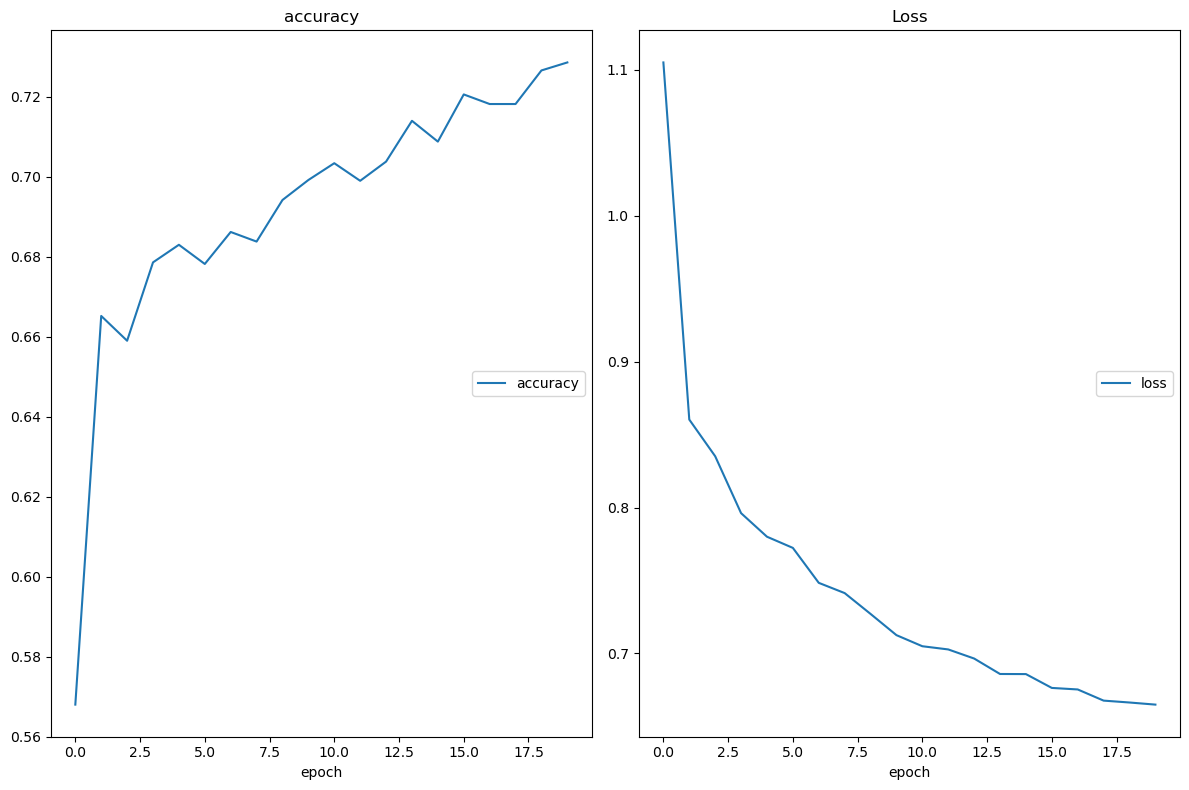

accuracy
	accuracy         	 (min:    0.568, max:    0.729, cur:    0.729)
Loss
	loss             	 (min:    0.665, max:    1.105, cur:    0.665)
250/250 [==============================] - 1s 3ms/step - loss: 0.6650 - accuracy: 0.7286


In [408]:
bestTestModelNN = grid_search.best_estimator_
bestTestModelNN.fit(X, y, epochs=20, callbacks=[PlotLossesKerasTF()], verbose=1)

In [ ]:
predictionsNNTest = bestTestModelNN.predict(test_set)
predictionsNNTest

### Escrever para ficheiro

In [ ]:
df = pd.DataFrame(predictionsNNTest)
df = df.rename({df.columns[0]: 'Incidents'}, axis=1)
 
scale_mapper = {0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very_High'}
df['Incidents'] = df['Incidents'].replace(scale_mapper)

df.reset_index()
df.index = np.arange(1, len(df) + 1)

df.to_csv("submissionNeuralNetwork.csv")

### XGBoost Classifier

In [96]:
starttime = time.process_time()

testModelBoost = XGBClassifier(n_estimators = 1000)

print(testModelBoost)
testModelBoost.fit(X, y)

endtime = time.process_time()

print(f"Tempo decorrido: {endtime - starttime} segundos")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Tempo decorrido: 51.04562704100002 segundos


In [97]:
predictionsBoostTest = testModelBoost.predict(test_set)
predictionsBoostTest

array([4, 0, 0, ..., 4, 4, 3])

## Escrever para ficheiro submisson.csv

In [84]:
df = pd.DataFrame(predictionsBoostTest)
df = df.rename({df.columns[0]: 'Incidents'}, axis=1)
 
scale_mapper1 = {0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very_High'}
df['Incidents'] = df['Incidents'].replace(scale_mapper1)

df.reset_index()
df.index = np.arange(1, len(df) + 1)

df.to_csv("submission.csv")